In [16]:
MAIN_DIR = "../output/bigdatacluster/randomizedOutput/experiment_adj2/"
RAW_DATA_DIR = "../data/feature_extraction/percentile/raw.csv"

SRS_TEST_NAMES_MAP = {                                                                      
    'comm':'SRS_COMMUNICATION_T',                                                                    
    'mot':'SRS_MOTIVATION_T',                        
    'cog':'SRS_COGNITION_T',                         
    'awa':'SRS_AWARENESS_T',                         
    'man':'SRS_MANNERISMS_T',                        
    'tot':'SRS_TOTAL_T'                              
} 

In [2]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict

In [3]:
large=22; med=16; small=12
params={
    'axes.titlesize': med,
    'legend.fontsize':med,
    'figure.figsize':(16, 10),
    'axes.labelsize': med,
    'xtick.labelsize': med,
    'ytick.labelsize':med,
    'figure.titlesize':large
}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [4]:
df = pd.read_csv('../data/feature_extraction/percentile/raw.csv', index_col=0)

In [5]:
df['DX_GROUP'].value_counts()

2    542
1    496
Name: DX_GROUP, dtype: int64

In [6]:
np.unique(list(map(lambda x: '_'.join(x[:2]) if len(x)==3 else '_'.join(x[:1]), df.index.str.split('_'))), return_counts=True)

(array(['BNI_1', 'EMC_1', 'ETH_1', 'GU_1', 'IP_1', 'IU_1', 'KKI', 'KUL_3',
        'NYU_1', 'NYU_2', 'OHSU_1', 'ONRC', 'SDSU_1', 'STANFORD', 'TCD_1',
        'UCD_1', 'UM', 'USM_1'], dtype='<U8'),
 array([ 58,  54,  37, 106,  56,  40, 211,  28,  78,  27,  93,  15,  58,
         42,  42,  32,  28,  33]))

# GOAL
Perform the required EDA for the data section of my paper

In [9]:
df_raw = pd.read_csv(RAW_DATA_DIR, index_col=0)

In [10]:
df_asd = df_raw[df_raw['DX_GROUP']==1][['AGE_AT_SCAN ','SEX']]
df_td = df_raw[df_raw['DX_GROUP']==2][['AGE_AT_SCAN ','SEX']]

In [11]:
df_raw['DX_GROUP'].value_counts()

2    542
1    496
Name: DX_GROUP, dtype: int64

In [12]:
df_demo = df_raw[['DX_GROUP','AGE_AT_SCAN ','SEX']]

In [17]:
severity_behavioral_dict = defaultdict(dict)
for severity_level in [x for x in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR,x))]:
    full_severity_path = os.path.join(MAIN_DIR, severity_level, f"AgebetweenNonetNone_{severity_level}_percentile_minmax")
    for behavioral_dir in [x for x in os.listdir(full_severity_path) if os.path.isdir(os.path.join(full_severity_path,x))]:
        df = pd.read_csv(os.path.join(full_severity_path, behavioral_dir, "group_df_beforeFixation.csv"), index_col=0)
        severity_col = f"categories_{SRS_TEST_NAMES_MAP[behavioral_dir.split('_')[-1]].split('_')[1]}"
        df_behav = df[[severity_col, SRS_TEST_NAMES_MAP[behavioral_dir.split('_')[-1]]]]
        df_demo = df_demo.join(df_behav, how='outer', rsuffix="_"+severity_level.split('_')[0])

In [18]:
def rename_cols(colname):
    name_parts = colname.split('_')
    if (name_parts[0] in ['SRS','categories'])and(name_parts[-1] not in ['sever', 'moderate']):
        return colname+"_"+"mild"
    else:
        return colname

In [19]:
df_demo.rename(columns=rename_cols, inplace=True)

In [20]:
df_demo['site'] = list(map(lambda x: x[0] ,df_demo.index.str.split('_')))

In [21]:
df_demo['site'].nunique()

17

In [22]:
df_demo['site'] = df_demo['site'].apply(lambda x: x[:5] if len(x)>5 else x)

In [23]:
pheno = df_demo.DX_GROUP.value_counts().rename({1:'ASD', 2:'TD'})

In [24]:
pheno

TD     542
ASD    496
Name: DX_GROUP, dtype: int64

In [25]:
pheno.values

array([542, 496])

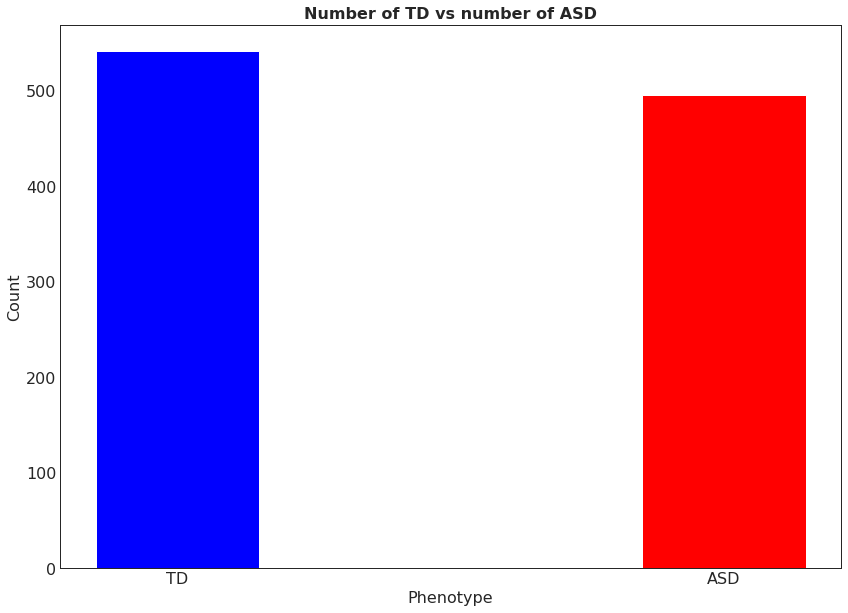

In [26]:
plt.figure(figsize=(14,10))
plt.bar(x=pheno.index, height=pheno.values, width=0.3, align='center', color=['blue','red'])
plt.title("Number of TD vs number of ASD", fontweight='bold')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.show()

In [27]:
df_demo

,DX_GROUP,AGE_AT_SCAN,SEX,categories_MOTIVATION_mild,SRS_MOTIVATION_T_mild,categories_TOTAL_mild,SRS_TOTAL_T_mild,categories_AWARENESS_mild,SRS_AWARENESS_T_mild,categories_COGNITION_mild,...,SRS_COGNITION_T_moderate,categories_MANNERISMS_moderate,SRS_MANNERISMS_T_moderate,categories_MOTIVATION_moderate,SRS_MOTIVATION_T_moderate,categories_COMMUNICATION_moderate,SRS_COMMUNICATION_T_moderate,categories_TOTAL_moderate,SRS_TOTAL_T_moderate,site
BNI_1_29006,1,48.0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,moderate,69.0,moderate,75.0,NaN,NaN,BNI
BNI_1_29007,1,41.0000,1,TD,56.0,mild,65.0,TD,52.0,mild,...,NaN,moderate,72.0,TD,56.0,moderate,68.0,NaN,NaN,BNI
BNI_1_29008,1,59.0000,1,TD,57.0,TD,57.0,TD,49.0,TD,...,49.0,TD,55.0,TD,57.0,NaN,NaN,TD,57.0,BNI
BNI_1_29009,1,57.0000,1,mild,62.0,TD,56.0,TD,41.0,mild,...,NaN,TD,53.0,NaN,NaN,TD,55.0,TD,56.0,BNI
BNI_1_29010,1,45.0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USM_1_29523,2,36.1451,1,TD,37.0,TD,35.0,TD,33.0,TD,...,36.0,TD,42.0,TD,37.0,TD,36.0,TD,35.0,USM
USM_1_29524,2,11.7892,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USM
USM_1_29525,2,23.2909,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USM
USM_1_29526,2,32.6242,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USM


In [28]:
df_demo['DX_GROUP_names'] = df_demo['DX_GROUP'].apply(lambda x: "ASD" if x==1 else "TD")

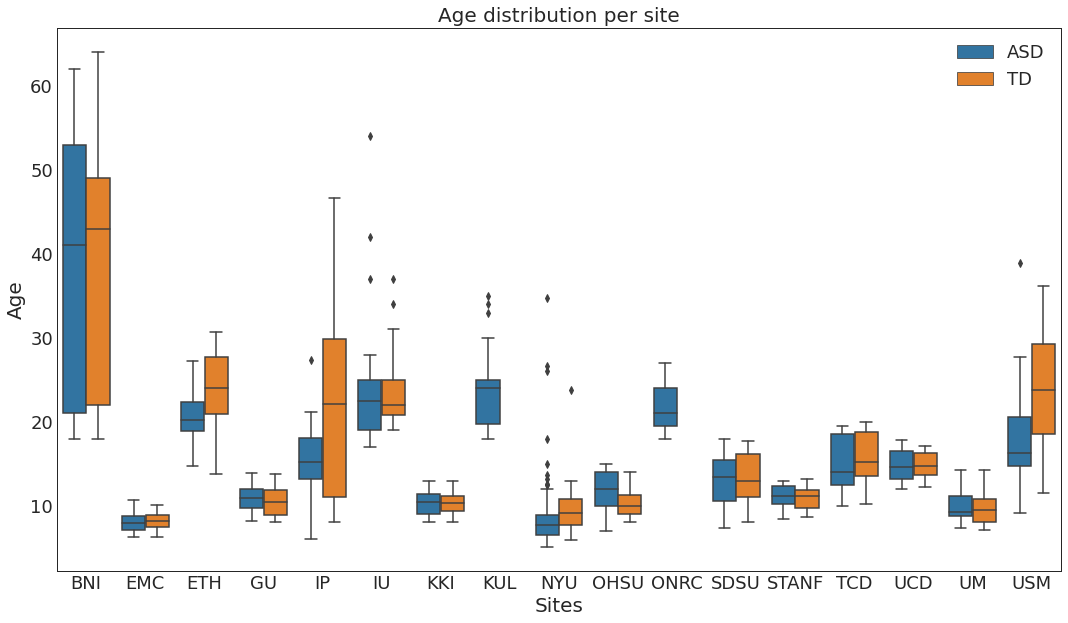

In [34]:
plt.figure(figsize=(18, 10))
sns.color_palette("tab10")

sns.boxplot(x='site',y='AGE_AT_SCAN ',data=df_demo, hue='DX_GROUP_names')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("Sites",fontsize=20)
plt.ylabel("Age", fontsize=20)

plt.legend(fontsize=18)
plt.title("Age distribution per site", fontsize=20)
plt.show()

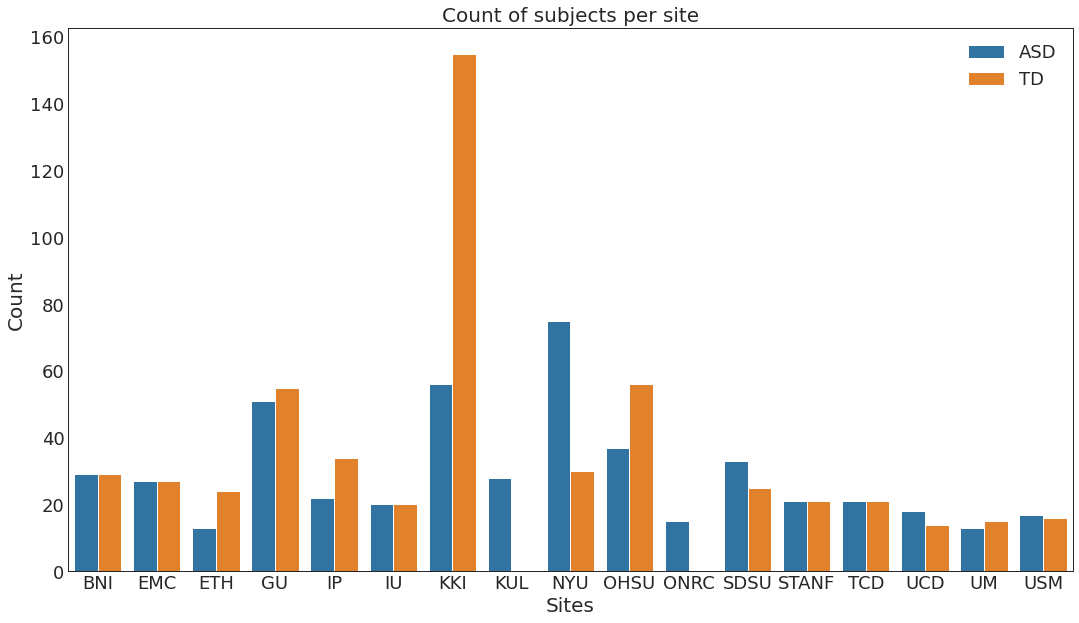

In [35]:
plt.figure(figsize=(18, 10))
sns.color_palette("tab10")
sns.countplot(x='site',data=df_demo, hue='DX_GROUP_names')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("Sites",fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.legend(fontsize=18)
plt.title("Count of subjects per site", fontsize=20)

plt.show()

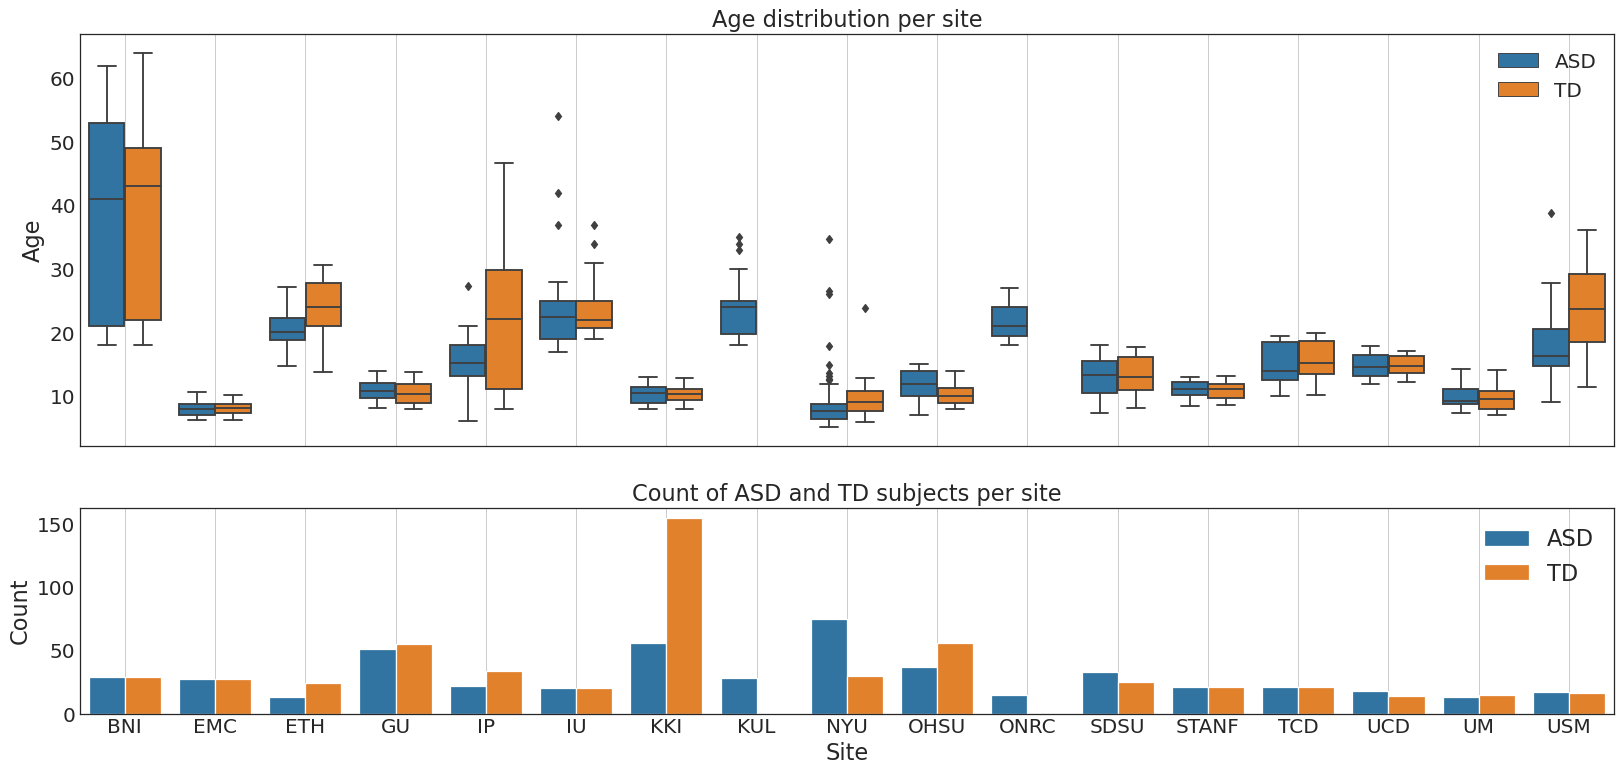

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(22,10), dpi=90, gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
ax1 = sns.boxplot(x='site',y='AGE_AT_SCAN ',data=df_demo, hue='DX_GROUP_names', ax=ax1)
# for patch in ax1.patches:
#     patch.set_width(1)
ax1.set_ylabel('Age', fontsize=18)
ax1.set_xlabel('')
ax1.set_title('Age distribution per site', fontsize=18)
ax1.xaxis.grid(True)
ax1.legend(fontsize=16)

ax2 = sns.countplot(x='site',data=df_demo, hue='DX_GROUP_names', ax=ax2)
ax2.set_ylabel('Count', fontsize=18)
ax2.set_xlabel('Site', fontsize=18)
ax2.set_title('Count of ASD and TD subjects per site', fontsize=18)
ax2.xaxis.grid(True)

plt.xticks(fontsize=16)

plt.legend(fontsize=18)
# plt.tight_layout()
plt.show()

In [41]:
fig.savefig('./site_based_eda.png')

# Missing values across behavioral reports

In [43]:
df_pheno = pd.read_csv('../data/feature_extraction/percentile/updated_pheno.csv')

In [44]:
df_pheno.drop(['SRS_TOTAL_RAW', 'SRS_AWARENESS_RAW',
       'SRS_COGNITION_RAW', 'SRS_COMMUNICATION_RAW', 'SRS_MOTIVATION_RAW',
       'SRS_MANNERISMS_RAW','Unnamed: 0', 'subj_id', 'DX_GROUP', 'AGE_AT_SCAN ', 'SEX'], axis=1, inplace=True)

In [45]:
nans_vals = {}
for col in df_pheno.columns:
    nans_vals[col] = df_pheno[col].isna().sum()
sorted_nans = sorted(nans_vals.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)

In [46]:
keys = list(map(lambda x: x[0], sorted_nans))
vals = list(map(lambda x: x[1], sorted_nans))


In [47]:
colors

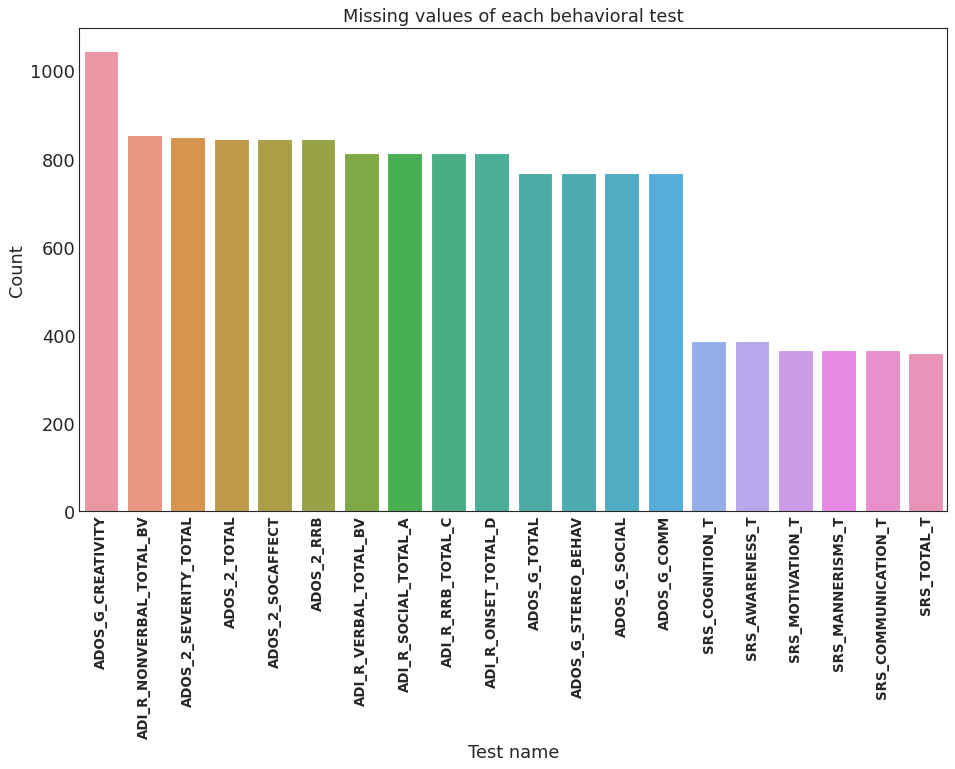

In [50]:
fig = plt.figure(figsize=(14,8), dpi=80)
colors = sns.set_palette('tab10')#, len(vals))
sns.barplot(x=keys, y=vals)
plt.xticks(fontsize=12, rotation=90, fontweight="bold")
plt.title('Missing values of each behavioral test')
plt.ylabel('Count')
plt.xlabel('Test name')
plt.show()

In [51]:
fig.savefig('./behavioral_missing_values')

# Figures related to Behaviors

In [52]:
df_demo['categories_COMMUNICATION'].value_counts()

KeyError: 'categories_COMMUNICATION'

In [53]:
df_behav_scores = df_demo[[col for col in df_demo.columns if 'SRS_' in col]+['DX_GROUP']]

In [54]:
srs_cols = [col for col in df_demo.columns if 'SRS_' in col]


/home/tarek/miniconda3/envs/brain_torch/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


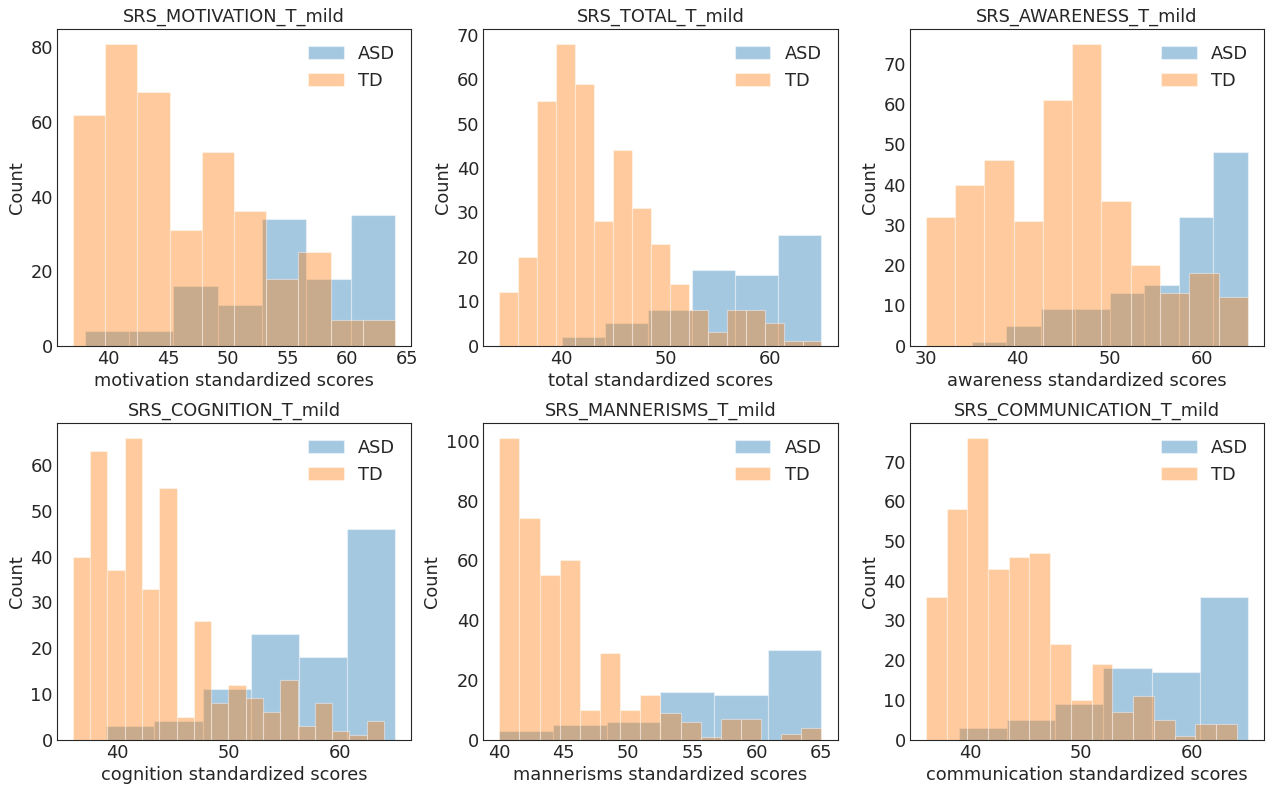

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(16,10), dpi=80)
for idx, ax in enumerate(np.ravel(axes)):
    df_behav_srs_asd = df_behav_scores[df_behav_scores['DX_GROUP']==1][srs_cols[idx]]
    df_behav_srs_td = df_behav_scores[df_behav_scores['DX_GROUP']==2][srs_cols[idx]]
    palette = iter(sns.color_palette('tab10', 2))
    sns.distplot(df_behav_srs_asd, kde=False,ax=ax, color=next(palette), label='ASD')
    sns.distplot(df_behav_srs_td, kde=False,ax=ax, color=next(palette), label='TD')
    ax.set_title(srs_cols[idx])
    ax.set_ylabel('Count')
    ax.set_xlabel(srs_cols[idx].split('_')[1].lower()+" standardized scores")
    ax.legend()
plt.tight_layout()
plt.legend()


In [238]:
fig.savefig('./SRS_distribution.png')

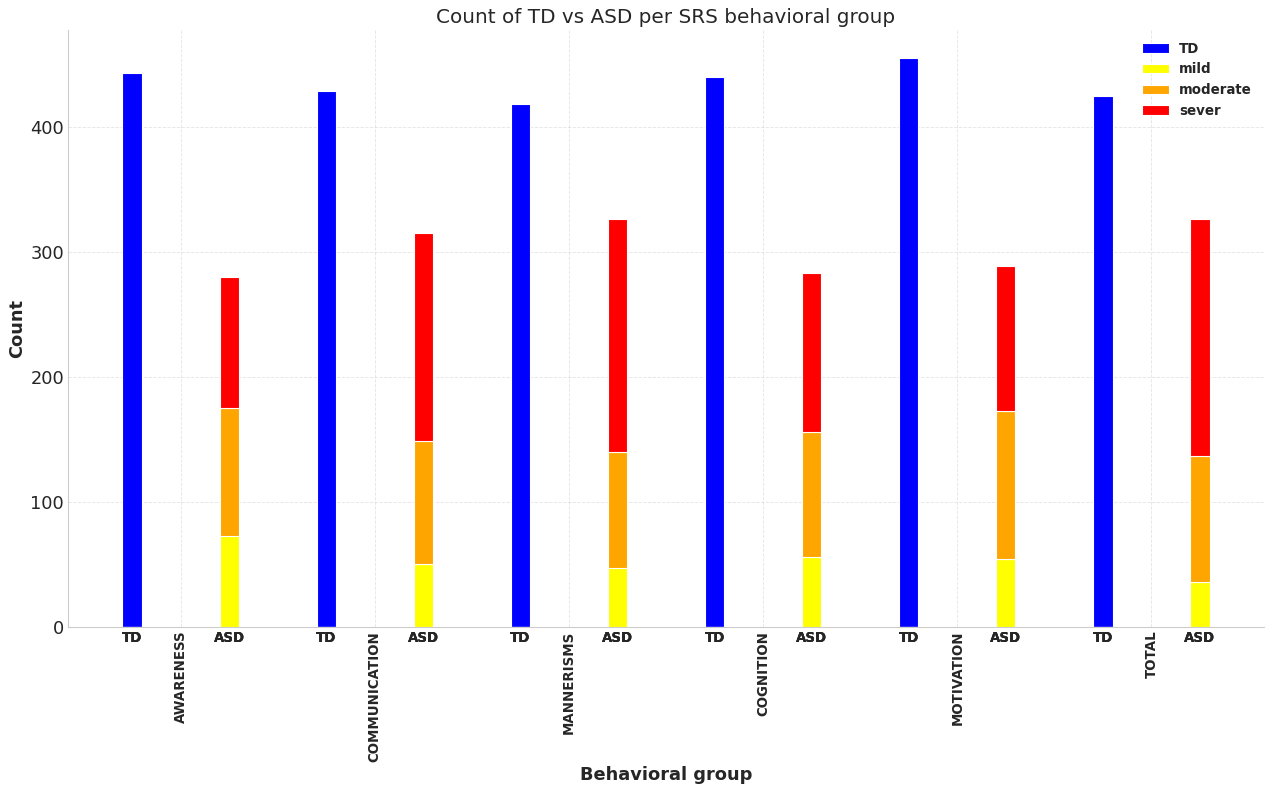

In [56]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi=80)
cnt = 0
minor_ticks = []
minor_ticks_labels = []
major_ticks = []
major_ticks_labels = []
for behavioral in ['AWARENESS','COMMUNICATION','MANNERISMS','COGNITION','MOTIVATION','TOTAL']:
    tn_cases = 0
    for i, severity in enumerate(['mild', 'moderate', 'sever']):
        if i == 0:
            ax.bar(x=[cnt, cnt+1], height=df_demo[f'categories_{behavioral}_{severity}'].value_counts(),
            width=0.2, color=['b', 'yellow'])
            tn_cases += df_demo[f'categories_{behavioral}_{severity}'].value_counts()[severity]

        else:
            TD = df_demo[f'categories_{behavioral}_{severity}'].value_counts()['TD']
            s = df_demo[f'categories_{behavioral}_{severity}'].value_counts()[severity]
            ax.bar(x=[cnt, cnt+1], height=[0, s],
            width=0.2, bottom=[0, tn_cases], color=['b', 'orange' if i==1 else 'red'])
            tn_cases += s
        
        minor_ticks.append(cnt)
        minor_ticks.append(cnt+1)
        minor_ticks_labels.append('TD')
        minor_ticks_labels.append('ASD')
    major_ticks.append(cnt+0.5)
    major_ticks_labels.append(behavioral)
    cnt +=2
ax.set_xticks(major_ticks)
ax.set_xticklabels(major_ticks_labels, fontsize=12, fontweight='bold', rotation=90)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticklabels(minor_ticks_labels,fontsize=12, fontweight='bold', minor=True)
ax.legend(handles=[
    mpl.patches.Patch(facecolor='blue', label='TD'),
    mpl.patches.Patch(facecolor='yellow', label='mild'),
    mpl.patches.Patch(facecolor='orange', label='moderate'),
    mpl.patches.Patch(facecolor='red', label='sever'),
    
], loc='best', prop={'size': 12, 'weight':'bold'})
ax.set_xlabel('Behavioral group', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')
ax.set_title('Count of TD vs ASD per SRS behavioral group', fontsize=18)
ax.grid(axis='both', alpha=0.25)
ax.set_xbound()
ax.spines['top'].set_alpha(0)
ax.spines['right'].set_alpha(0)

# plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
        

In [26]:
df_demo['categories_AWARENESS_mild'].value_counts()

TD      443
mild     73
Name: categories_AWARENESS_mild, dtype: int64

In [39]:
df_demo['categories_AWARENESS_moderate'].value_counts()

TD          443
moderate    102
Name: categories_AWARENESS_moderate, dtype: int64

In [43]:
df_demo['categories_AWARENESS_sever'].value_counts()

TD       443
sever    105
Name: categories_AWARENESS_sever, dtype: int64

In [44]:
105+102+73

280